# Predicting cab booking cancellation
### Capstone Project One 
### Notebook by Debisree Ray


## Checking the Data : Data wrangling and Visualization <br />

Following are the data fields in the dataset, which we are going to read in the Pandas dataframe.


* id - booking ID<br />
* user_id - the ID of the customer (based on mobile number)<br />
* vehicle_model_id - vehicle model type.<br />
* package_id - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)<br />
* travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental).<br />
* from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages <br />
* to_area_id - unique identifier of area. Applicable only for point-to-point travel <br />
* from_city_id - unique identifier of city <br />
* to_city_id - unique identifier of city (only for intercity) <br />
* from_date - time stamp of requested trip start <br />
* to_date - time stamp of trip end <br />
* online_booking - if booking was done on desktop website <br />
* mobile_site_booking - if booking was done on mobile website <br />
* booking_created - time stamp of booking <br />
* from_lat - latitude of from area <br />
* from_long - longitude of from area <br />
* to_lat - latitude of to area <br />
* to_long - longitude of to area <br />
* Car_Cancellation (available only in training data) - whether the booking was cancelled (1) or not (0) due to unavailability of a car. <br />
* Cost_of_error (available only in training data) - the cost incurred if the booking is misclassified. The cost of misclassifying an uncancelled booking as a cancelled booking (cost=1 unit). The cost associated with misclassifying a cancelled booking as uncancelled, This cost is a function of how close the cancellation occurs relative to the trip start time. The closer the trip, the higher the cost. Cancellations occurring less than 15 minutes prior to the trip start incur a fixed penalty of 100 units. <br />


**Let's start as follows:**

- Importing all the necessary libraries <br />
- Checking the working directory, if needed, the directory needs to be changed to where 
  we have all the data files

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
os.getcwd()
#os.chdir ('Springboard_Debisree/predicting-cab-booking-cancellations/')

'/Users/debisreeray/Desktop/Springboard_Debisree/predicting-cab-booking-cancellations'

In [2]:
df = pd.read_csv('Kaggle_YourCabs_training.csv')
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 20 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-nu

In [4]:
#convert from_date column, to_date column and booking_created column to date-time
#Note: when we try to convert NaN to date-time, it gets converted to NaT(Not a timestamp)


df['from_date'] = pd.to_datetime(df['from_date'])
df['to_date'] = pd.to_datetime(df['to_date'])
df['booking_created'] = pd.to_datetime(df['booking_created'])
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0


In [108]:
#summary statistics of the dataframe:
df.describe()

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
count,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000,43431.000000
mean,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114,8.000509
std,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680,25.350698
min,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000,0.150000
25%,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000,1.000000
50%,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000,1.000000
75%,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000,1.000000
max,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000,100.000000


We see that many of the columns (eg. 'package_id', 'to_area_id' etc.) have missing values. 

In [109]:
#Let's set id to be the index of the dataset

#df.set_index('id', inplace=True)
#df.head()

In [97]:
#find out the class balance
df.Car_Cancellation.value_counts()
cancel = df.Car_Cancellation.value_counts()
print(cancel.values)

[40299  3132]


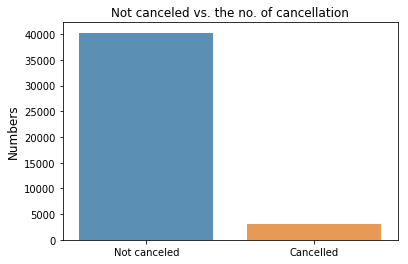

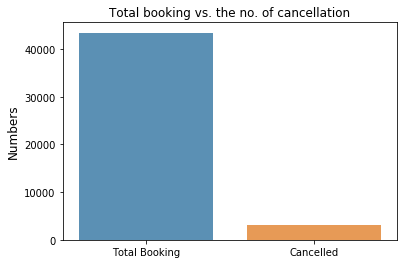

In [141]:
#Visual display
#plt.figure(figsize=(10,5))

y = cancel.values
x= ['Not canceled','Cancelled']
sb.barplot(x,y,alpha=0.8)
plt.title('Not canceled vs. the no. of cancellation')
plt.ylabel('Numbers', fontsize=12)
#plt.xlabel('', fontsize=12)
plt.show()

#Similar another plot

y = [43431,3132]
x= ['Total Booking','Cancelled']
sb.barplot(x,y,alpha=0.8)
plt.title('Total booking vs. the no. of cancellation')
plt.ylabel('Numbers', fontsize=12)
#plt.xlabel('Total bo', fontsize=12)
plt.show()

So, there is major class imbalance in the data. Very few cancellations as compared to large amount of non-cancellations. We can see, only ~7% of the total booking has been cancelled.

In [39]:
#Let's see how many users returned for the service
c=df.user_id.value_counts()
print(c.values)


[471 245 211 ...   1   1   1]
No of returning customers are:15935
No of one time users: 6332


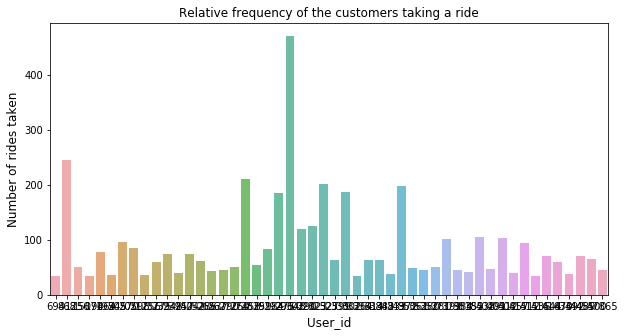

In [94]:
#Visual representation (50 rows from the data set)
ct= c[:50]
plt.figure(figsize=(10,5))
sb.barplot(ct.index, ct.values, alpha=0.8)
plt.title('Relative frequency of the customers taking a ride ')
plt.ylabel('Number of rides taken', fontsize=12)
plt.xlabel('User_id', fontsize=12)
plt.show()

So, now we can see, the user with the user_id '29648' is the most frequent user, with frequency 471! So, there are some returning customers and, some are the one time users. This data can be important for the marketing and sales group. 

No. of one time users (non returning) are: 15935
No. of returning customers are:6332


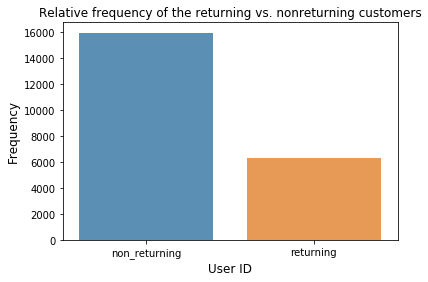

In [69]:
#Let's see how many customers are returning
not_frequent= np.count_nonzero(c.values == 1)
is_frequent = np.count_nonzero(c.values >1)
print('No. of one time users (non returning) are: ' + str(not_frequent))
print('No. of returning customers are:'+str(is_frequent))

#Visual display:
#plt.figure(figsize=(10,5))
freq = [not_frequent, is_frequent]
index= ['non_returning','returning']
sb.barplot(index,freq,alpha=0.8)
plt.title('Relative frequency of the returning vs. nonreturning customers')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('User ID', fontsize=12)
plt.show()

[3503 2651  502  412  375  101    6]
Float64Index([1.0, 2.0, 6.0, 4.0, 3.0, 7.0, 5.0], dtype='float64')


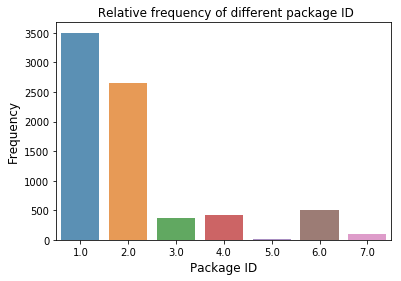

In [103]:
# Let's see the distribution of package_id
package=df.package_id.value_counts()
print(package.values)
print(package.index)


#visual display
sb.barplot(package.index,package.values,alpha=0.8)
plt.title(' Relative frequency of different package ID')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Package ID', fontsize=12)
plt.show()

So, what we see is, most of the packages people opt for are for a journey of 4hrs and around 40kms, followed by 8hrs and 80kms. (The description of different package IDs have been given above, in the description of the fields.)

[34292  7550  1589]
Int64Index([2, 3, 1], dtype='int64')


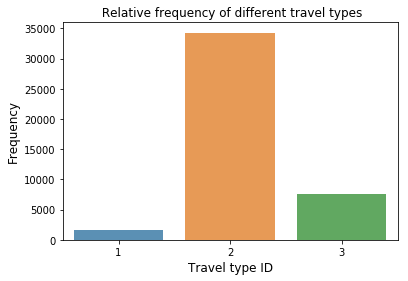

In [154]:
#Explore the distributions of different travel types:
travel = df.travel_type_id.value_counts()
print(travel.values)
print(travel.index)

#Visually:
sb.barplot(travel.index,travel.values,alpha=0.8)
plt.title(' Relative frequency of different travel types')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Travel type ID', fontsize=12)
plt.show()



So, most of the time people hire the cab for travel type '2', i.e. for point to point travel.
(Again, the explaination of different travel type has been given above, in the description of 
data fields.)

Int64Index([12, 85, 89, 65, 28, 24, 87, 90, 23, 86, 10, 64, 54, 17, 91, 30, 36,
            13, 43, 72,  1, 75, 76, 39, 70, 69, 14],
           dtype='int64')
[31859  2407  2391  1912  1702  1494   565   312   297   123   104    85
    73    40    25    14     9     7     2     2     2     1     1     1
     1     1     1]


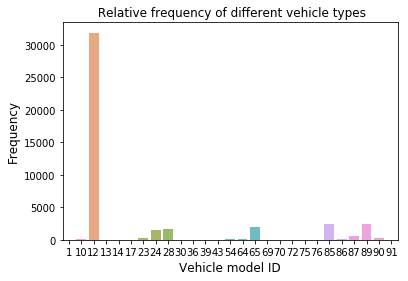

In [218]:
#Let's see different vehicle model type
vehicle=df.vehicle_model_id.value_counts()
print(vehicle.index)
print(vehicle.values)

#visually
sb.barplot(x=vehicle.index,y=vehicle.values,alpha=0.8)
plt.title(' Relative frequency of different vehicle types')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Vehicle model ID', fontsize=12)
plt.show()



So, 27 different types of vehicles have been listed here. The most popular one is the vehicle with the vehicle id no '12'. It has been used 31859 times.

In [82]:
#Exploring different ways of booking
mobile= df.mobile_site_booking.value_counts()
print(mobile.values)
print(mobile.index)

online= df.online_booking.value_counts()
print(online.values)
print(online.index)


[41553  1878]
Int64Index([0, 1], dtype='int64')
[28161 15270]
Int64Index([0, 1], dtype='int64')


So, we see that 1878 bookings have been done from mobile websites, 15270 bookings from desktop websites, so, clearly 26283 bookings have been done differently! (Total no. of bookings=43431) So, the other methods of booking are mostly popular. though, nothing has been stated about that.

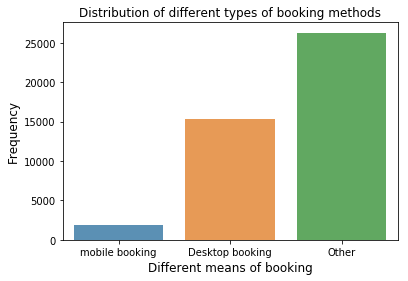

In [184]:
#Relative study by visualization

x= ['mobile booking','Desktop booking','Other']
y=[1878,15270,26283]
sb.barplot(x,y,alpha=0.8)
plt.title('Distribution of different types of booking methods')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Different means of booking', fontsize=12)
plt.show()


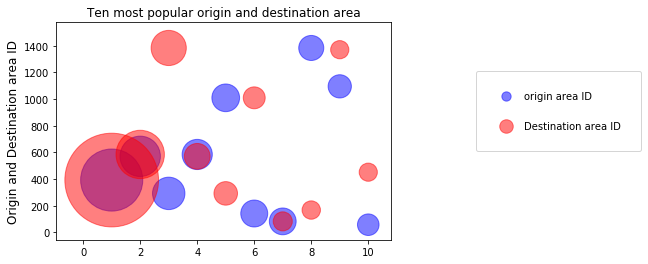

In [221]:
#Let's explore the origin area information

from_area=df.from_area_id.value_counts()
#print(from_area.index)
#print(from_area.values)

to_area= df.to_area_id.value_counts()
#print(to_area.index)
#print(to_area.values)

f= from_area.index[:10,]
x=[1,2,3,4,5,6,7,8,9,10]
area= from_area.values[:10,]
t= to_area.index[:10,]
area1=to_area.values[:10,]



fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y=f, c='b', marker="o",s=area,label='origin area ID',alpha=0.5)
ax1.scatter(x,y=t, c='r', marker="o", s=area1,label='Destination area ID',alpha=0.5)
plt.ylabel('Origin and Destination area ID', fontsize=12)
plt.title('Ten most popular origin and destination area')
ax1.legend(loc='upper center', bbox_to_anchor=(1.5, 0.8),ncol=1,borderpad=2,labelspacing=2,markerscale=.2)
plt.show()


So, 598 unique origin area and 568 destination area informations have been listed. We can see that the most popular origin area is the area with area_id no. '393', which is eventually the most popular destination area as well. <br />

Above, I have plotted the 10 most popular area (both the origin and the destination) from the available data. Bigger the circles, more frequent (or popular) it is in the given dataset. Some area_IDs are common to both as the origin and the destination (concentric circles in the picture).

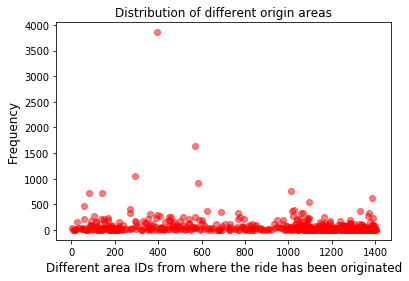

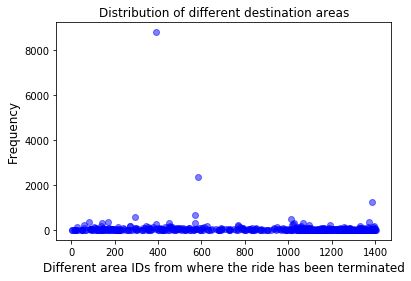

In [134]:
#Visually
#plt.subplot(1,2,1)
plt.scatter(x=from_area.index,y=from_area.values,alpha=0.5,color='r')
plt.title('Distribution of different origin areas')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Different area IDs from where the ride has been originated', fontsize=12)
plt.show()
#plt.subplot(1,2,2)
plt.scatter(x=to_area.index,y=to_area.values,alpha=0.5,color='b')
plt.title('Distribution of different destination areas')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Different area IDs from where the ride has been terminated', fontsize=12)
plt.show()

Float64Index([15.0, 1.0, 31.0], dtype='float64')
[16233   106     6]


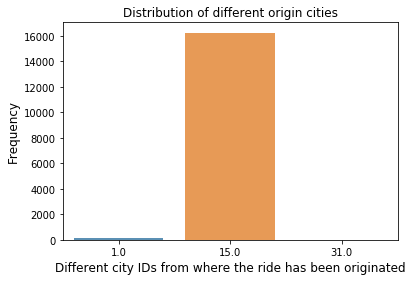

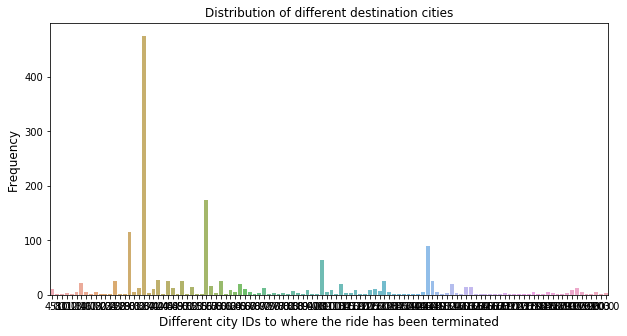

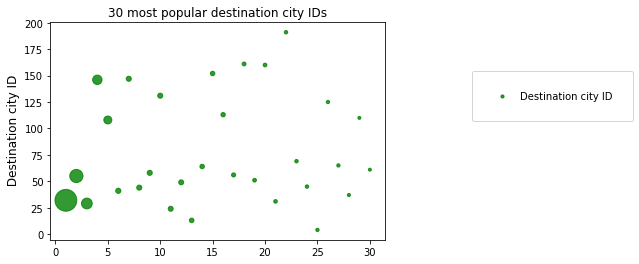

In [232]:
from_city=df.from_city_id.value_counts()
print(from_city.index)
print(from_city.values)
to_city=df.to_city_id.value_counts()

#print(to_city.index)
#print(to_city.values)
city= to_city.index[:30,]
fr=to_city.values[:30,]
xx=list(range(1,31))
#print(xx)
#print(city)
#print(fr)
#Visual representation

sb.barplot(from_city.index,from_city.values,alpha=0.8)
plt.title('Distribution of different origin cities')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Different city IDs from where the ride has been originated', fontsize=12)
plt.show()
plt.figure(figsize=(10,5))
sb.barplot(to_city.index,to_city.values,alpha=0.8)
plt.title('Distribution of different destination cities')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Different city IDs to where the ride has been terminated', fontsize=12)
plt.show()


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(xx, y=city, c='g', marker="o",s=fr,label='Destination city ID',alpha=0.8)
#ax1.scatter(xxx,y=from_city.index,c='k',marker="o",s=to,label='Origin city ID',alpha =0.8)
plt.ylabel(' Destination city ID', fontsize=12)
plt.title('30 most popular destination city IDs')
ax1.legend(loc='upper center', bbox_to_anchor=(1.5, 0.8),ncol=1,borderpad=2,labelspacing=2,markerscale=.2)
plt.show()

So, in conclusion, we can see that only 3 origin cities have been recorded. The most popular origin city is the city with ID no '15'. Where as, the destination cities are more in numbers 116 unique destination cities have been recorded. The most popular destination city is the city with ID no '32' (475 rides have their destination to this city.)

However, we need to rememeber that, only 16345 non-null values are available in 'from_city_id' information and 1588 non-null values are available in 'to_city_id' information. So, most of the information is missing.

Maximum booking created at a given timestamp:18
And the corresponding date-time is: 2013-10-31 10:30:00
Minimum booking created at a given timestamp:1


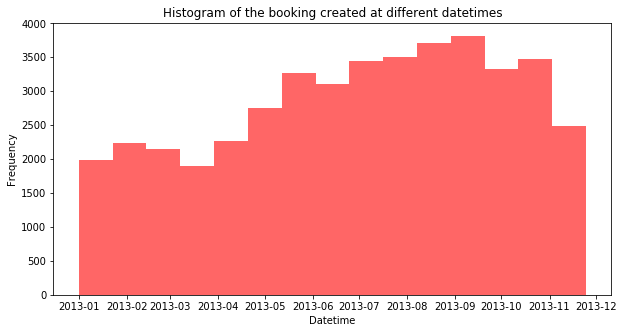

In [92]:
time=df.booking_created.value_counts()
t=df.booking_created
#print(time)

max=time.values.max()
min=time.values.min()

#t=time.loc[time.values == max]

print('Maximum booking created at a given timestamp:'+ str(max))
print('And the corresponding date-time is: 2013-10-31 10:30:00')
print('Minimum booking created at a given timestamp:'+str(min))
plt.figure(1, figsize=(10, 5))
plt.hist(t,color='r',alpha=0.6,bins=15)
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.title('Histogram of the booking created at different datetimes')
plt.show()

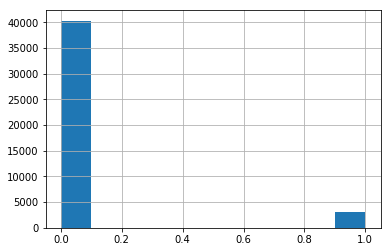

In [11]:
df.Car_Cancellation.hist();

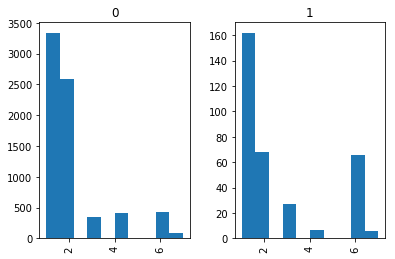

In [12]:
# Let's see if the package type can affect the car cancellations
df.hist(column='package_id', by='Car_Cancellation');

**So we can see that, most of the times 1st package ( 4hrs & 40kms ) gets cancelled followed by the packages ( 3hrs & 30kms ) and ( 8hrs & 80kms )**

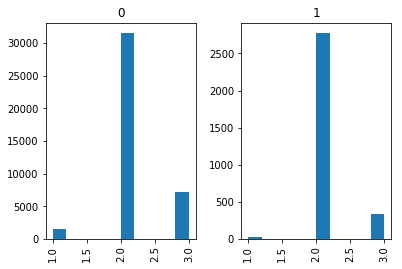

In [13]:
# Lets take a look at travel_type variable
df.hist(column='travel_type_id', by='Car_Cancellation');

**Most people rent car from point to point travel and around ( 1 / 10 )th of these bookings get cancelled**

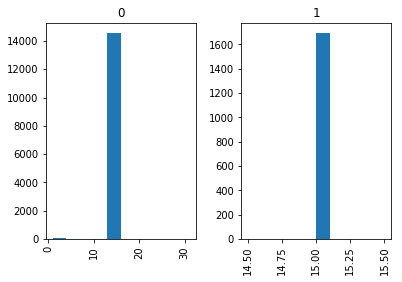

In [14]:
df.hist(column='from_city_id',by='Car_Cancellation');

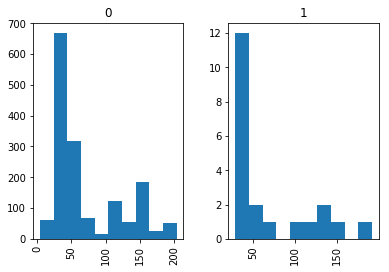

In [7]:
df.hist(column='to_city_id',by='Car_Cancellation');

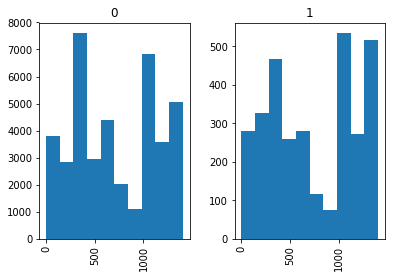

In [3]:
df.hist(column='from_area_id',by='Car_Cancellation');

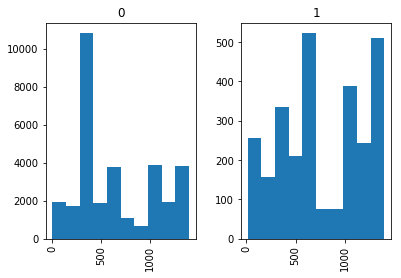

In [8]:
df.hist(column='to_area_id',by='Car_Cancellation');

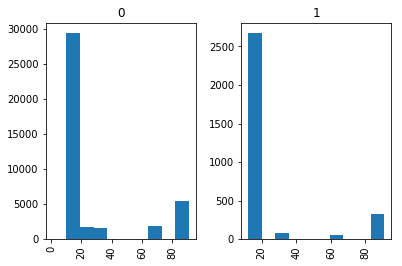

In [4]:
df.hist(column='vehicle_model_id',by='Car_Cancellation');

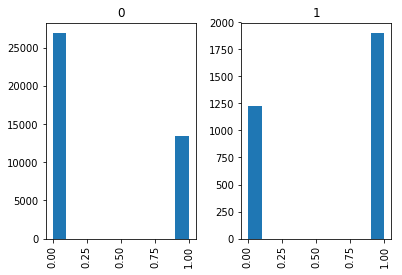

In [25]:
df.hist(column='online_booking',by='Car_Cancellation');

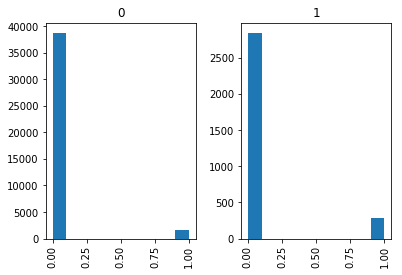

In [29]:
df.hist(column='mobile_site_booking',by='Car_Cancellation');

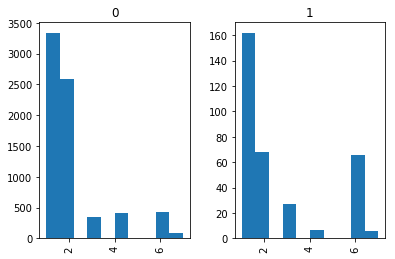

In [24]:
df.hist('package_id','Car_Cancellation');